0. Cargar librerías

In [1]:
from google.colab import drive
drive.mount("/content/drive")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Google minería de datos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import roc_curve
#Métricas para evaluar los modelos
from sklearn.metrics import confusion_matrix
#Graficador para hacer dashboards
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

Mounted at /content/drive


**KNN COMO MODELO DE CLASIFICACIÓN Y AGRUPAMIENTO**

In [3]:
XDB=pd.read_excel('/content/drive/MyDrive/salaries-_2.xlsx', sheet_name=1)
XDB.head()
XDB=XDB[['work_year','salary','job_title', 'salary_in_usd', 'company_size']]
XDB=XDB.dropna()
XDB.corr()
dfcorrel=pd.DataFrame(XDB.corr())
dfcorrel.to_excel('InformeCorrel.xlsx')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


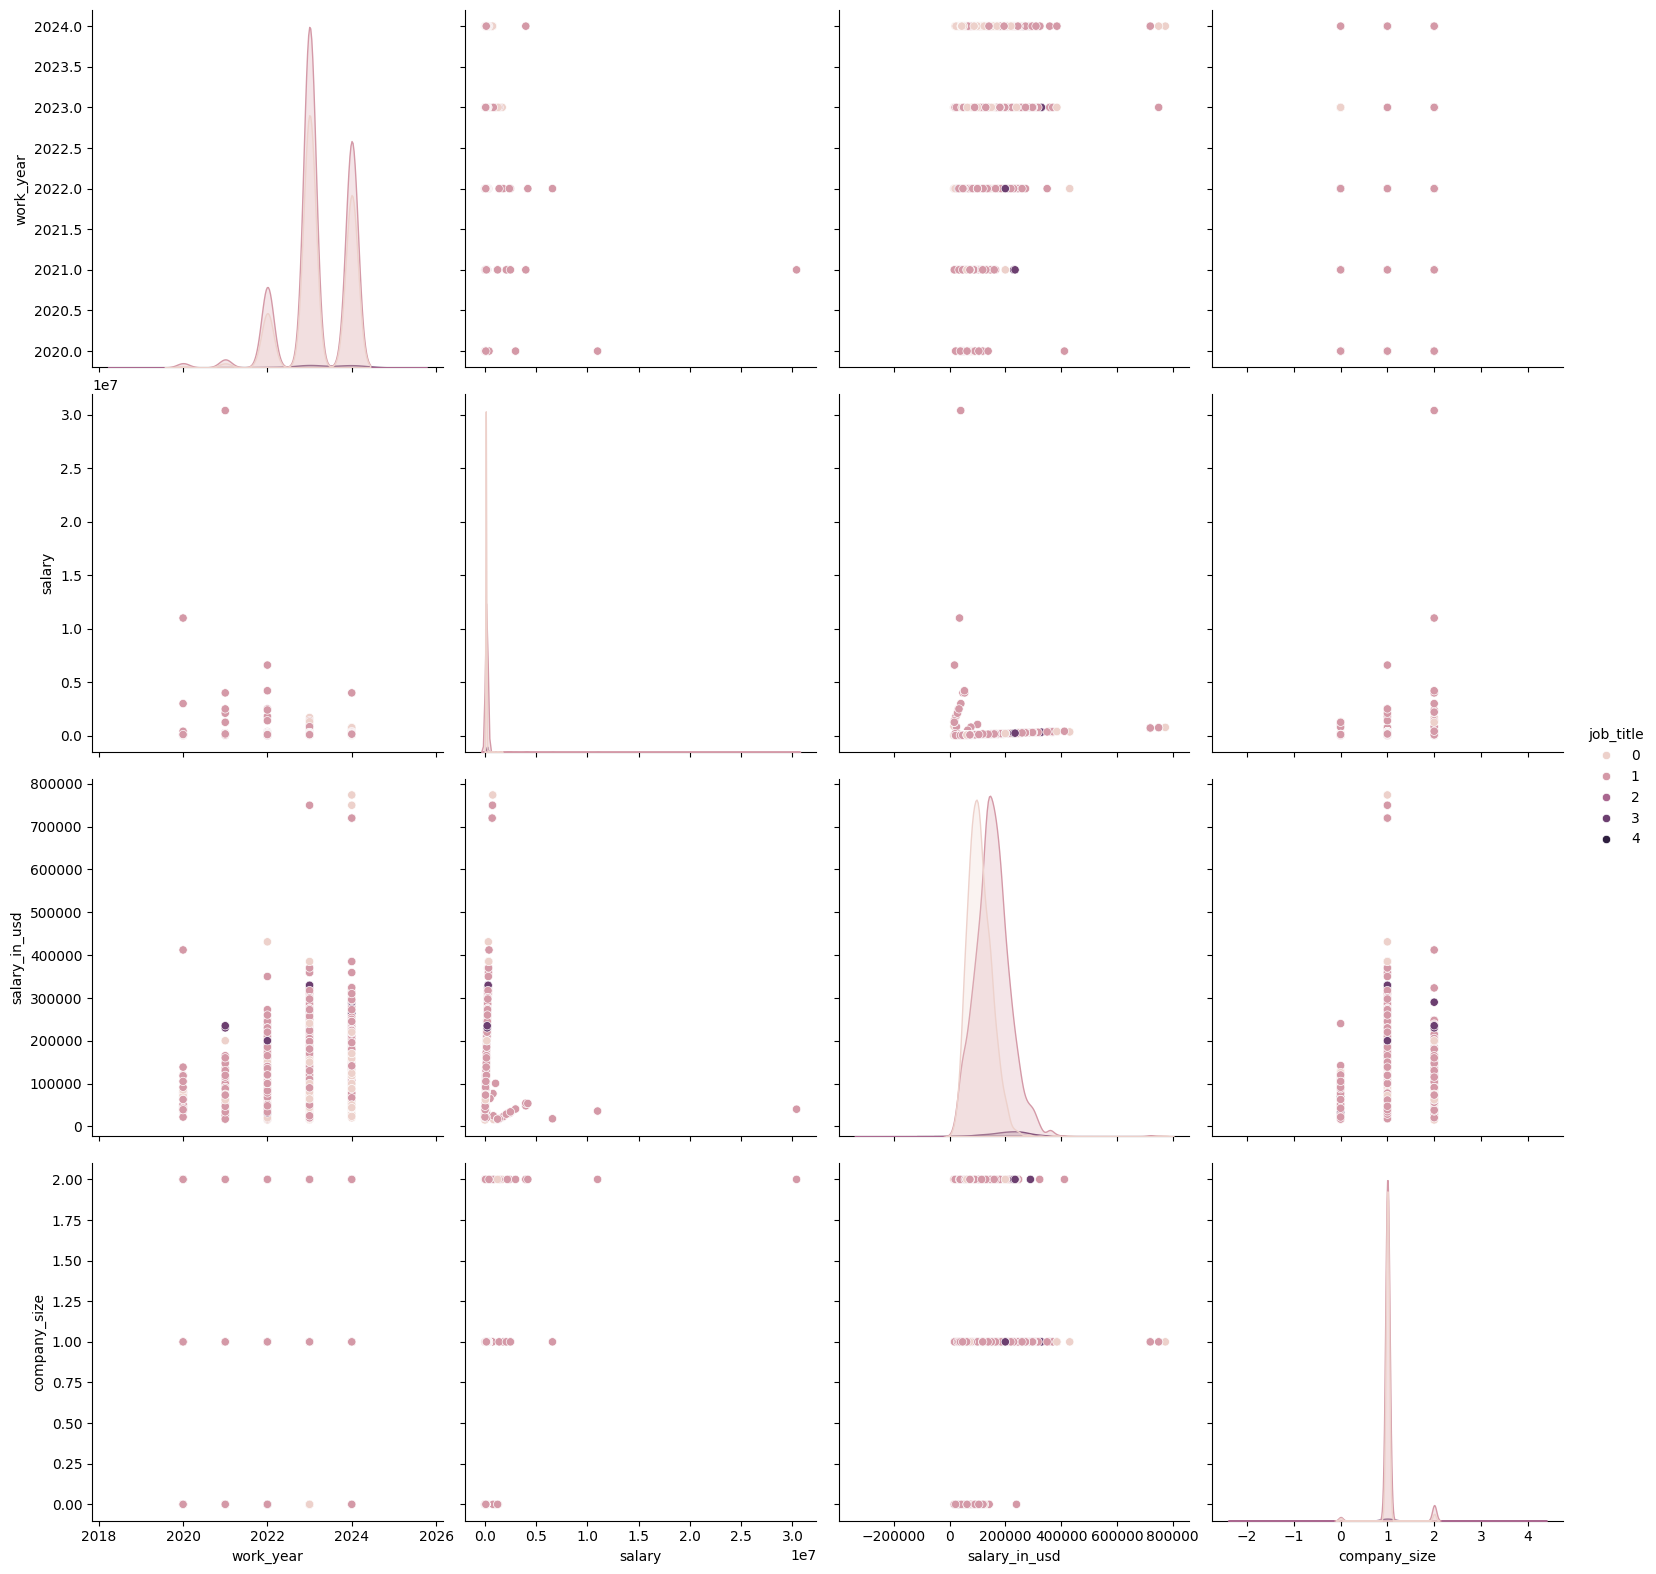

In [4]:
#creamos el dashboard
sns.pairplot(XDB, hue='job_title', size=4, vars=['work_year','salary', 'salary_in_usd','company_size'])

In [5]:
#datos de entrada - datos de salida
XD=np.array(XDB[['work_year','salary', 'salary_in_usd','company_size']])
yd=np.array(XDB[['job_title']])

mknn=KNeighborsClassifier(n_neighbors=10)
mknn.fit(XD,yd)
ydp=mknn.predict(XD)

print("La precision en el pronostico es:", metrics.accuracy_score(yd,ydp))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


La precision en el pronostico es: 0.7446185638023075


In [6]:
#Matriz de confusión
cm=confusion_matrix(yd,ydp)
print(cm)
df=pd.DataFrame(cm)
df.to_excel('MatrizConfusion.xlsx')

[[1881  546    0    1    0]
 [ 872 2437    0    3    0]
 [   2    1    0    0    0]
 [   5   50    0    6    0]
 [   1    2    0    0    0]]


In [7]:
#Metricas sobre el comportamiento en general de modelo
VP=cm[0,0];FN=cm[0,1]
FP=cm[1,0];VN=cm[1,1]
print("La exactitud es:", (VP+VN)/(VP+FN+FP+VN))
#Comportamiento tasa de error
print("La Tasa de Error es:", (FP+FN)/(VP+FN+FP+VN))
#COEFICIENTE DE SENSIBILIDAD DEL MODELO
print("El coeficiente de sensibilidad",VP/(VP+FN))
#COEFICIENTE DE ESPECIFICIDAD
print("El coeficiente de especificidad", VN/(FP+VN))
#LA CALIDAD DE LOS DATOS PARA EL PRONOSTICO POSITIVO ES
print("Pronostico Positivo:", VP/(VP+FP))
#LA CALIDAD DE LOS DATOS PARA EL PRONOSTICO NEGATIVO ES
print("Pronostico Negativo",VN/(FN+VN))

La exactitud es: 0.75278940027894
La Tasa de Error es: 0.24721059972105996
El coeficiente de sensibilidad 0.7750309023485785
El coeficiente de especificidad 0.7364762768207918
Pronostico Positivo: 0.6832546313112967
Pronostico Negativo 0.8169627891384512


- Evaluamos a un individuo

La decision frente al titulo del trabajo es: [1]


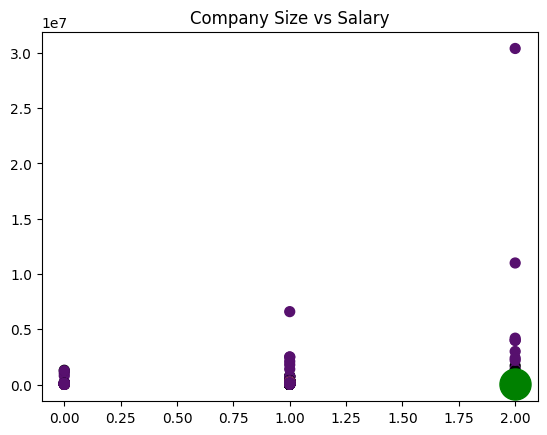

In [8]:
XDi=np.array([(2024,12000,87664,2)])
ydi=mknn.predict(XDi)
print("La decision frente al titulo del trabajo es:", ydi)

plt.scatter(XD[:,3],XD[:,1],c=yd, s=50, cmap='inferno')  #c es como se colocan los datos, s tamaño de punto, cmap el color
plt.scatter(XDi[:,3],XDi[:,1],marker='o',s=500,facecolor='green')
plt.title('Company Size vs Salary')
plt.show()

- Madaline de pronostico

Epoch 1/250
10/10 [==============================] - 1s 4ms/step - loss: 0.0804
Epoch 2/250
10/10 [==============================] - 0s 3ms/step - loss: 0.0721
Epoch 3/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0649
Epoch 4/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0589
Epoch 5/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0544
Epoch 6/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0510
Epoch 7/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 8/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0475
Epoch 9/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 10/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 11/250
10/10 [==============================] - 0s 3ms/step - loss: 0.0462
Epoch 12/250
10/10 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 13/250
10/10 [=================

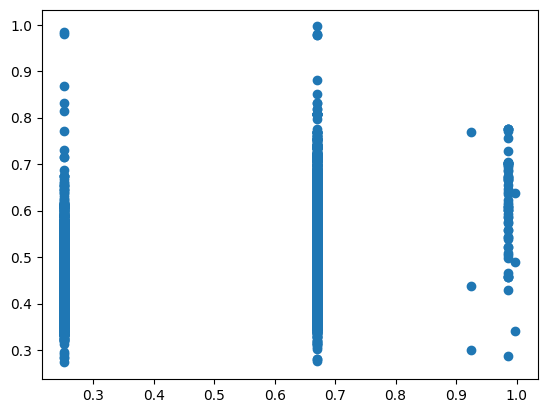

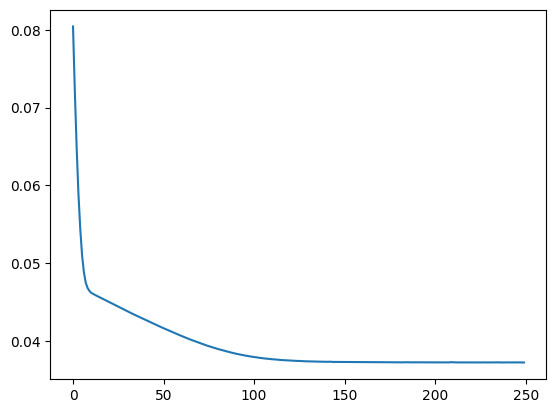

<Figure size 640x480 with 0 Axes>

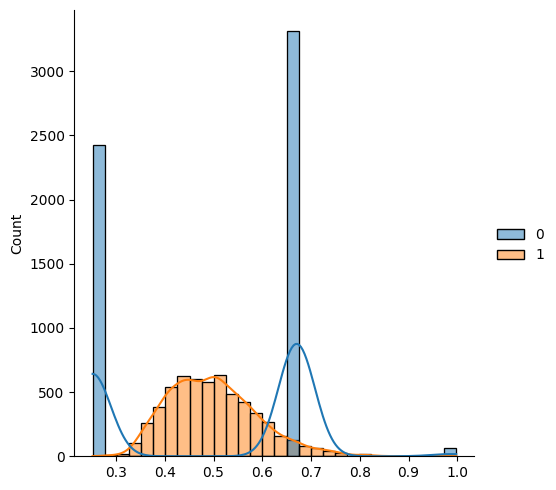

la discrepancia entre las medias es: -0.5014598006121695
la discrepancia entre dispersiones es: 0.5667151344688856


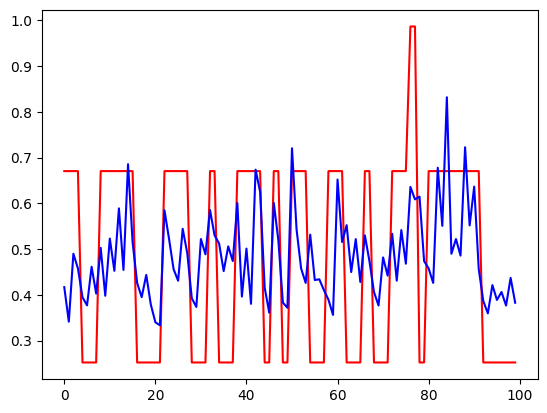

In [9]:
yd2=np.array(XDB[['job_title']])
yd2c=(yd2-np.mean(yd2))/np.std(yd2) #hacemos el centramiento
yd2p=1/(1+np.exp(-yd2c))#esta es la probabilidad de un score alto
XDn=np.array(XDB[['work_year','salary', 'salary_in_usd','company_size']])
XDn=XD/np.max(XD,axis=0) #normalizamos los datos
NE=4
model=Sequential()
model.add(Dense(10,activation='linear',use_bias=False,input_dim=NE))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mse')
history=model.fit(XDn,yd2p,epochs=250,batch_size=581)
ys=model.predict(XDn)

#grafico de dispersion
plt.figure()
plt.scatter(yd2p,ys)
plt.show
#matriz de correlacion
df2=pd.DataFrame(np.column_stack((yd2p,ys)))
df2.corr()
print("la correlacion es:",df.corr())
#efectos independientes
W2=model.layers[0].get_weights()[0]
C2=model.layers[1].get_weights()[0]
np.dot(W2,C2)
print("los efectos independientes son:\n",np.dot(W2,C2))

#Cómo evoluciona el error
plt.figure()
plt.plot(history.history['loss'])
plt.show()

#como son las distribuciones de los datos
plt.figure()
sns.displot((yd2p.flatten(),ys.flatten()),kde=True)
plt.show()

#discrepancia entre medias
dscm=(np.mean(yd2p)-np.mean(ys)/np.mean(yd2p))
print("la discrepancia entre las medias es:",dscm) #si da negativo es que esta sobreentrando (estan por encima de los originales)

#discrepancia entre desviaciones
dscv=((np.std(yd2p)-np.std(ys))/np.std(yd2p))
print("la discrepancia entre dispersiones es:", dscv)

#la grafica de los datos de referencia es:
plt.figure()
plt.plot(yd2p[0:100,],'r',ys[0:100,],'b')
plt.show()

Probabilidad de que un individuo trabaje como head of data

In [12]:
#Individuo: (2024,12000,87664,2)
XDi1=np.array([2024, 12000, 87664,2])
#Se normalizan las variables
XDi1n=XDi1/np.max(XD,axis=0)
print("Datos normalizados del individuo 1 \n",XDi1n)

Datos normalizados del individuo 1 
 [1.00000000e+00 3.94736842e-04 1.13260982e-01 1.00000000e+00]


In [15]:
yi1=((1*-0.98897815)+(0.000394736842*7.277372)+(0.113260982*4.7989583)+(1*0.46784657))
yp1=1/(1+np.exp(-yi1))
print("La probabilidad del individuo de ser Head of Data es \n",yp1*100)

La probabilidad del individuo de ser Head of Data es 
 50.63186127271686
